# Task4

## Analyze and visualize sentiment patterns in social media

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load The Dataset
df = pd.read_csv(r"D:\Data Sceince\Prodigy\Task4\archive (8)\twitter_training.csv")
df.sample(6)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
26029,869,AssassinsCreed,Irrelevant,Nex xbox is gonna have Fencins creed run at 30...
11292,13142,Xbox(Xseries),Positive,"With the Xbox Series X, Microsoft has killed K..."
47618,5771,HomeDepot,Positive,From your 5085 Home Depot Famoly Happy Birthda...
60746,4808,GrandTheftAuto(GTA),Negative,this is so false its beyond even funny lmao
53481,10790,RedDeadRedemption(RDR),Positive,"A year and a half after buying it, I finally b..."
66446,6978,johnson&johnson,Positive,"""A recent report from Oxfam found out ten out ..."


In [5]:
df.columns=["ID","Keyword","Label","Tweet",]

In [7]:
df.sample(ignore_index=True)
df.sample(3)

,ID,Keyword,Label,Tweet
23203,4375,CS-GO,Positive,Mm in @ CSGO be like: 3 games in a row with 2 ...
58039,11552,TomClancysRainbowSix,Positive,@ Rainbow6Game I love getting shield through m...
30804,7292,LeagueOfLegends,Neutral,Twitch.tv / 1trickporo. LIVE 6pm AEST. ES GONG...


### Data Preprocessing

In [12]:
# Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       74681 non-null  int64 
 1   Keyword  74681 non-null  object
 2   Label    74681 non-null  object
 3   Tweet    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [14]:
# Shape Of The Data
print(f"Shape Of The Data:- Rows = {df.shape[0]} & columns = {df.shape[1]}")

Shape Of The Data:- Rows = 74681 & columns = 4


In [16]:
# Check The Datatypes:
df.dtypes

ID          int64
Keyword    object
Label      object
Tweet      object
dtype: object

In [18]:
# Descriptive statistics values of all numerical columns:
df.describe()

,ID
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [20]:
# Check any null value or nut:
df.isnull().sum()

ID           0
Keyword      0
Label        0
Tweet      686
dtype: int64

In [22]:
# Remove Null Values
df.dropna(inplace=True)

In [24]:
# Check any null value or nut:
df.isnull().sum()

ID         0
Keyword    0
Label      0
Tweet      0
dtype: int64

In [26]:
# Check For Duplicates 
df.duplicated().sum()

2340

In [28]:
# Remove Duplicates
df.drop_duplicates(inplace=True)

In [30]:
# Check For Duplicates 
df.duplicated().sum()

0

In [32]:
# Column name Of Dataste
df.columns

Index(['ID', 'Keyword', 'Label', 'Tweet'], dtype='object')

In [34]:
# Diffrent Type Of Keyords for Sentiment Analysis
df["Keyword"].value_counts()

Keyword
TomClancysRainbowSix                 2328
Verizon                              2319
MaddenNFL                            2315
CallOfDuty                           2314
Microsoft                            2304
WorldOfCraft                         2300
NBA2K                                2299
LeagueOfLegends                      2296
TomClancysGhostRecon                 2291
Facebook                             2289
ApexLegends                          2278
johnson&johnson                      2257
Battlefield                          2255
Amazon                               2249
CallOfDutyBlackopsColdWar            2242
FIFA                                 2238
Dota2                                2225
Overwatch                            2220
Hearthstone                          2219
HomeDepot                            2216
GrandTheftAuto(GTA)                  2208
Borderlands                          2205
Xbox(Xseries)                        2201
Google                    

In [36]:
# Diffrent Type Of Labels For Sentiment Analysis
df["Label"].value_counts()

Label
Negative      21698
Positive      19712
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

## Explorartory Data Analysis-(EDA)

In [39]:
image_folder = r"D:\Data Sceince\Prodigy\Task4\Visuals"

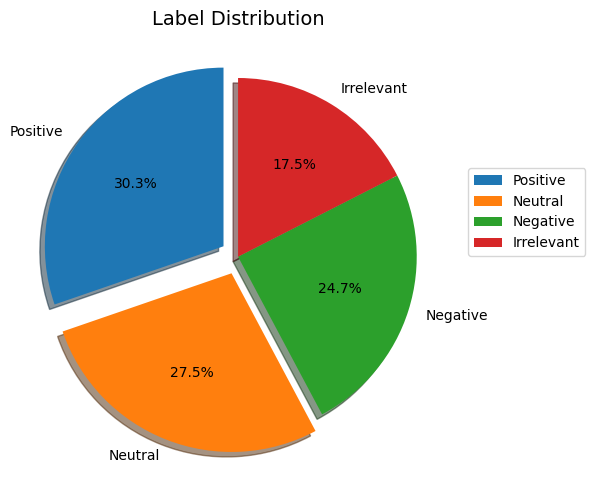

In [41]:

explode = [0.1,0.1,0,0]
plt.figure(figsize=(12,5))
plt.pie(df['Label'].value_counts(),labels=df["Label"].unique(),explode=explode,startangle=90,shadow=True,autopct="%1.1f%%")
plt.title("Label Distribution",fontsize=14)
plt.legend(loc = "center left", bbox_to_anchor=(1,0.6))
plt.tight_layout()
plt.savefig(os.path.join(image_folder,"Label Distribution"))
plt.show()

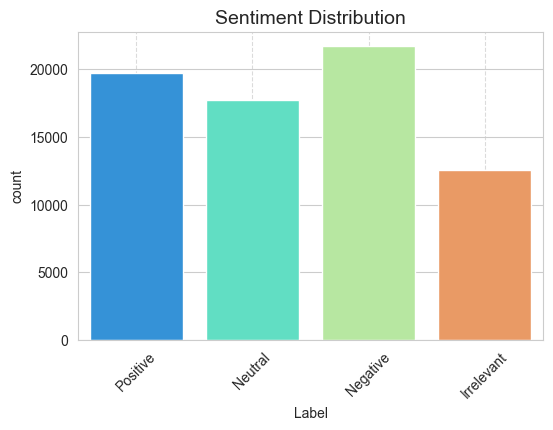

In [43]:
# Set up the visualization style
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(data=df,x=df["Label"],palette="rainbow")
plt.xticks(rotation=45)
plt.title("Sentiment Distribution",fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.savefig(os.path.join(image_folder,"Sentiment Distribution"))
plt.show()

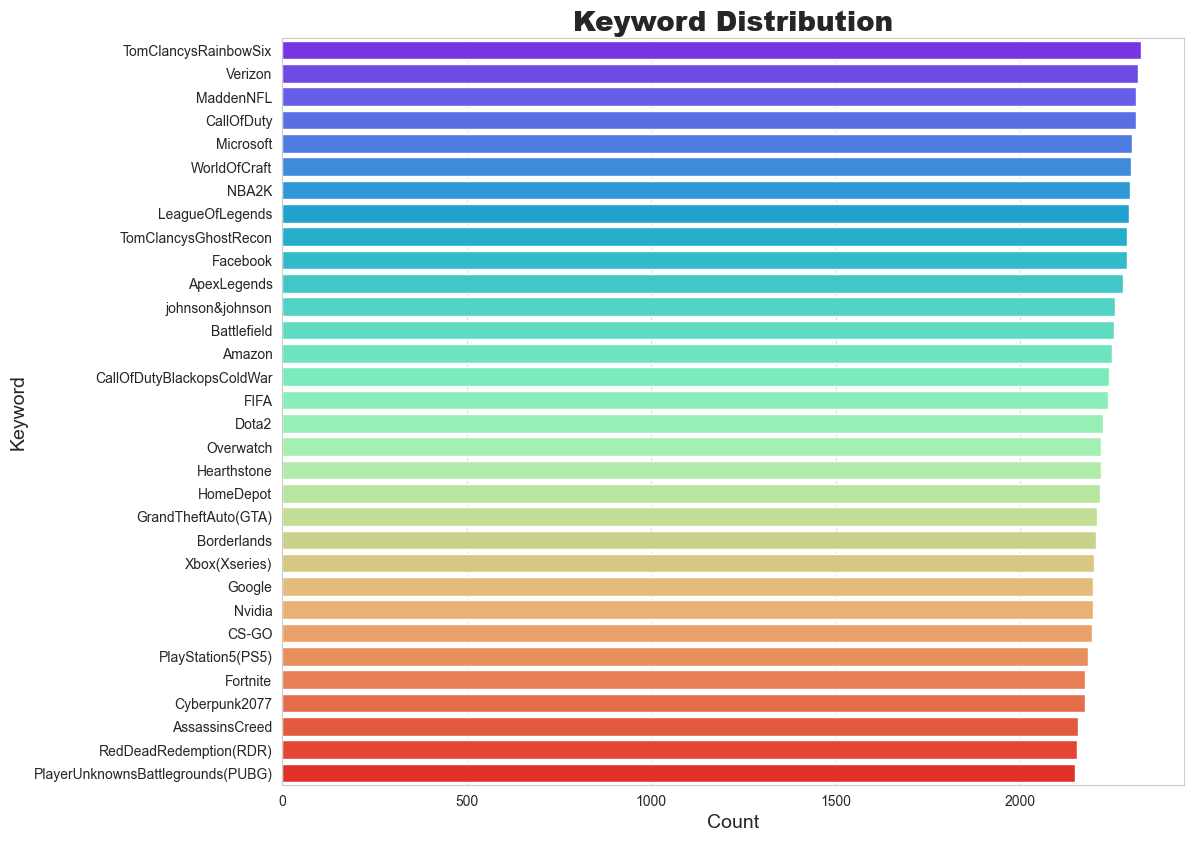

In [45]:
plt.figure(figsize=(12,8))
sns.barplot(x=df["Keyword"].value_counts().values,y=df["Keyword"].value_counts().index,palette="rainbow")
plt.tight_layout()
plt.title("Keyword Distribution",fontsize=20,fontweight="black")
plt.xlabel("Count", fontsize=14)
plt.ylabel("Keyword", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.savefig(os.path.join(image_folder,"Keyword Distribution"))
plt.show()

In [49]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [50]:
def clean_text(text):
    doc=nlp(text)
    cleaned_tokens = []

    for tokens in doc:
        if tokens.is_punct or tokens.is_stop:
            continue

        else:
            cleaned_tokens.append(tokens.lemma_)

    return " ".join(cleaned_tokens)

In [53]:
df["cleaned_text"] = df["Tweet"].apply(clean_text)  # Assuming 'text' is your actual column name

In [55]:
df.head()

,ID,Keyword,Label,Tweet,cleaned_text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,m get borderland kill
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,m come borderland murder
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,m get borderland 2 murder
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,m get borderland murder


In [57]:
import textblob
from textblob import TextBlob
# Sentiment Score Extraction : Use a pre-trained model to analyze sentiment :
def get_sentiment_polarity(Text):
    return TextBlob(Text).sentiment.polarity
# Apply Sentiment Analysis
df["Sentiment_Score"] = df["Label"].apply(get_sentiment_polarity)
# Display Sample Result
df[["cleaned_text","Label","Sentiment_Score"]].sample(5)

,cleaned_text,Label,Sentiment_Score
26140,good thing America play christian creed,Negative,-0.300000
38586,Horizon Zero Dawn polish Hearthstone story Per...,Neutral,0.000000
53380,see check Red Dead Redemption main stream game...,Neutral,0.000000
48494,thing shop face mask mean twice long folk Home...,Negative,-0.300000
33675,love fortnite pic.twitter.com/seqciitmsl,Positive,0.227273


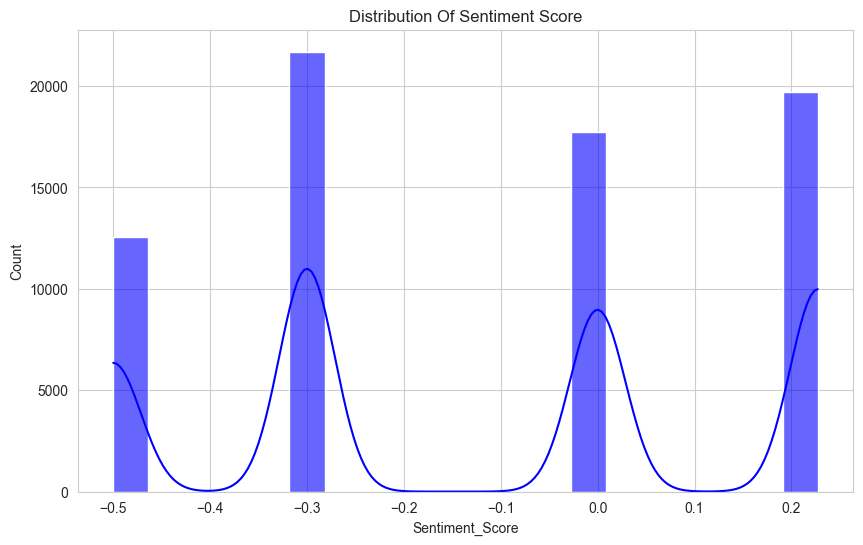

In [58]:
# Visualization  of Sentiment Score
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df["Sentiment_Score"],bins=20,alpha=0.6,kde=True,color="blue")
plt.xlabel("Sentiment_Score")
plt.ylabel("Count")
plt.title("Distribution Of Sentiment Score")
plt.savefig(os.path.join(image_folder,"Distribution Of Sentiment Score"))
plt.show()

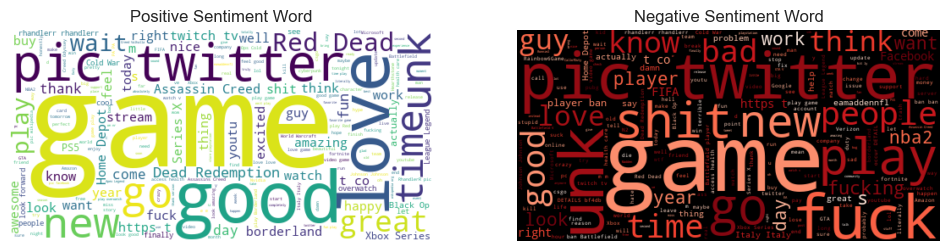

In [61]:
# Import
#!pip install wordcloud
from wordcloud import WordCloud

# Seperate Posistive Comment And Negative Comment
positive_text=" ".join(df[df["Sentiment_Score"]>0]["cleaned_text"])
negative_text=" ".join(df[df["Sentiment_Score"]<0]["cleaned_text"])  

# Generate Word Clouds
plt.figure(figsize=(12,5))

# Positive sentiment word cloud
plt.subplot(1,2,1)
wordcloud_pos = WordCloud(width=500,height=250,background_color="white").generate(positive_text)
plt.imshow(wordcloud_pos,interpolation="bilinear")
plt.axis("off")
plt.savefig(os.path.join(image_folder,"Positive Sentiment Word"))
plt.title("Positive Sentiment Word")


# Negative sentiment word cloud
plt.subplot(1,2,2)
wordcloud_neg =  WordCloud(width=500,height=250,background_color="black",colormap="Reds").generate(negative_text)
plt.imshow(wordcloud_neg,interpolation="bilinear")
plt.axis("off")
plt.savefig(os.path.join(image_folder,"Negative Sentiment Word"))
plt.title("Negative Sentiment Word")


plt.show()


In [63]:
# Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Label"] = label_encoder.fit_transform(df["Label"])

In [65]:
# Splitting Data
X = df["cleaned_text"]
y = df["Label"]

### Train And Test Split

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [70]:
# Feature Extraction using TF - IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#Display dataset shape after processing
X_train_tfidf.shape, X_test_tfidf.shape

((57324, 26732), (14331, 26732))

## Function For Model Evaluation :

In [73]:
from sklearn.metrics import accuracy_score, classification_report

In [75]:
# Model-1 : Bernouli Naive Bayes :-
from sklearn.naive_bayes import BernoulliNB
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train_tfidf,y_train)
y_pred_1 = BNBmodel.predict(X_test_tfidf)

accuracy1 = accuracy_score(y_test,y_pred_1)
classification1 = classification_report(y_test,y_pred_1)

print("\nBernoulli Naive Bayes Results:")
print(f"Accuracy:{accuracy1}")
print("Classification Report:\n",classification1)


Bernoulli Naive Bayes Results:
Accuracy:0.726815993301235
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.56      0.68      2455
           1       0.74      0.81      0.77      4433
           2       0.87      0.58      0.70      3532
           3       0.62      0.87      0.72      3911

    accuracy                           0.73     14331
   macro avg       0.77      0.70      0.72     14331
weighted avg       0.76      0.73      0.72     14331



In [79]:
# Model 2 - Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_tfidf,y_train)
y_pred_2 = random_forest.predict(X_test_tfidf)

accuracy2 = accuracy_score(y_test,y_pred_2)
classification2 = classification_report(y_test,y_pred_2)

print("\nRandom Forest Result")
print("Accuracy:",accuracy2)
print("Classification Report:\n",classification2)


Random Forest Result
Accuracy: 0.909636452445747
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90      2455
           1       0.93      0.93      0.93      4433
           2       0.93      0.90      0.91      3532
           3       0.85      0.94      0.89      3911

    accuracy                           0.91     14331
   macro avg       0.92      0.90      0.91     14331
weighted avg       0.91      0.91      0.91     14331



In [80]:
# Model - 3 Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
Descision_Tree = DecisionTreeClassifier()
Descision_Tree.fit(X_train_tfidf,y_train)
y_predict_3=Descision_Tree.predict(X_test_tfidf)

accuracy3 = accuracy_score(y_test,y_predict_3)
classification3 = classification_report(y_test,y_predict_3)

print("\nDecision Tree Result")
print(f"Accuracy:{accuracy3}")
print("Classification_Report\n",classification3)


Decision Tree Result
Accuracy:0.7939432000558231
Classification_Report
               precision    recall  f1-score   support

           0       0.77      0.71      0.74      2455
           1       0.83      0.82      0.83      4433
           2       0.81      0.77      0.79      3532
           3       0.75      0.84      0.79      3911

    accuracy                           0.79     14331
   macro avg       0.79      0.79      0.79     14331
weighted avg       0.80      0.79      0.79     14331



In [83]:
# Model - 4 Logistic Regression
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model.fit(X_train_tfidf,y_train)
y_predict_4=LR_model.predict(X_test_tfidf)

accuracy4 = accuracy_score(y_test,y_predict_4)
classification4 = classification_report(y_test,y_predict_4)

print("\nLogistic Regression Result")
print(f"Accuracy:{accuracy4}")
print("Classification_Report\n",classification4)


Logistic Regression Result
Accuracy:0.7704277440513572
Classification_Report
               precision    recall  f1-score   support

           0       0.81      0.67      0.73      2455
           1       0.76      0.85      0.80      4433
           2       0.78      0.73      0.76      3532
           3       0.76      0.78      0.77      3911

    accuracy                           0.77     14331
   macro avg       0.78      0.76      0.76     14331
weighted avg       0.77      0.77      0.77     14331



**NOTE :** 
* From the above different models, Model-2 i.e "Random Forest" Performs better as compared to other models. 
* Therefore, we consider "Random Forest" is the best model.

***
# Observation

**Sentiment Distribution**
* The dataset consists of tweets categorized into different sentiment classes: Positive, Negative, Neutral, Irrelevant.
* The majority of tweets fall under Negative and Positive categories, while Positive sentiment is less frequent.